<a href="https://colab.research.google.com/github/igorfnogueira/analise_venda_veiculos/blob/main/Analise_Venda_de_Veiculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**Dados criados pela biblioteca Faker**

#Contexto
A empresa XPTO, atuante no setor de vendas de veículos seminovos, solicitou uma análise exploratória de seus dados de vendas. O objetivo é identificar padrões de consumo, tendências temporais, perfil dos clientes, desempenho por marca e formas de pagamento mais utilizadas. A partir disso, será possível embasar decisões estratégicas voltadas para otimização de vendas e melhor entendimento do mercado em que atua.

A base dados pode ser acessada no seguinte link: [Clique Aqui.](https://www.kaggle.com/datasets/fbarbosaoliveira/vendas-de-veculos-seminovos)


#1 - Questões Básicas (Manipulação de Dados)

##1.1 - Exploração Inicial

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns



df = pd.read_csv('/content/vendas_loja_seminovos.csv', sep=';')
df.head()

,ID,Nome Completo,Idade,CPF,Sexo,Estado Civil,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento
0,1,Luigi Silva,53,910.623.485-24,Masculino,Viúvo,monteirovalentim@example.org,+55 21 0592 1284,Azevedo de da Rosa,SP,Toyota,Yaris,2021,Cinza,80028.52,2017-08-31,À vista
1,2,Ester da Rocha,63,235.408.196-06,Feminino,Solteiro,santoshenry@example.net,(084) 2407 2800,Costela,PR,Hyundai,HB20S,2016,Cinza,103668.13,2022-01-01,Consórcio
2,3,Maria Luiza Nogueira,25,174.950.328-04,Feminino,Solteiro,zgoncalves@example.net,+55 81 2567 8847,Sá Alegre,MG,Ford,Ecosport,2017,Preto,229867.69,2018-02-17,À vista
3,4,Renan Novaes,19,245.367.890-65,Masculino,Casado,oliver50@example.com,+55 (021) 0411 4291,Guerra,MA,Honda,Fit,2020,Cinza,105843.27,2024-02-03,Financiamento
4,5,Manuela Novais,40,371.269.084-31,Feminino,Casado,tpinto@example.org,(011) 8890 3785,Castro de Minas,PI,Ford,Ka,2022,Cinza,66929.84,2019-06-29,Financiamento


A marca Volkswagen está escrita errada, está 'Volskwagen', então vou substitui-lá

In [ ]:
df['Marca'].unique()

array(['Toyota', 'Hyundai', 'Ford', 'Honda', 'Citroen', 'Peugeot', 'Fiat',
       'Volskwagen', 'Chevrolet', 'Jeep'], dtype=object)

In [ ]:
df['Marca'] = df['Marca'].str.replace('Volskwagen', 'Volkswagen', case=False)

df['Marca'].unique()

array(['Toyota', 'Hyundai', 'Ford', 'Honda', 'Citroen', 'Peugeot', 'Fiat',
       'Volkswagen', 'Chevrolet', 'Jeep'], dtype=object)

* Quantos registros existem no dataset?

In [ ]:
print(f'O DF tem {len(df)} registros')

O DF tem 10950 registros


* Quais são as colunas disponíveis e seus tipos de dados?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10950 non-null  int64  
 1   Nome Completo    10950 non-null  object 
 2   Idade            10950 non-null  int64  
 3   CPF              10950 non-null  object 
 4   Sexo             10950 non-null  object 
 5   Estado Civil     10950 non-null  object 
 6   E-mail           10950 non-null  object 
 7   Telefone         10950 non-null  object 
 8   Cidade           10950 non-null  object 
 9   Estado           10950 non-null  object 
 10  Marca            10950 non-null  object 
 11  Modelo           10950 non-null  object 
 12  Ano_fabricacao   10950 non-null  int64  
 13  Cor              10950 non-null  object 
 14  Valor_venda      10950 non-null  float64
 15  Data_venda       10950 non-null  object 
 16  Forma_pagamento  10950 non-null  object 
dtypes: float64(1

* Existem valores nulos no dataset? Se sim, em quais colunas?


In [ ]:
df.isnull().sum()

,0
ID,0
Nome Completo,0
Idade,0
CPF,0
Sexo,0
Estado Civil,0
E-mail,0
Telefone,0
Cidade,0
Estado,0


Não há valores nulos no dataset.

## 1.2 - Filtros Simples

* Quantos carros da marca Toyota foram vendidos?

In [ ]:
toyota_vendidos = df.groupby('Marca').size()['Toyota']
print(f'Foram vendidos {toyota_vendidos} carros da marca Toyota')


Foram vendidos 2178 carros da marca Toyota


* Liste todos os clientes do estado de São Paulo (SP).

In [ ]:
clientes_sp = df[df['Estado'] == 'SP'].copy()
clientes_sp = clientes_sp.drop_duplicates(subset=['CPF'])
clientes_sp

,ID,Nome Completo,Idade,CPF,Sexo,Estado Civil,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento
0,1,Luigi Silva,53,910.623.485-24,Masculino,Viúvo,monteirovalentim@example.org,+55 21 0592 1284,Azevedo de da Rosa,SP,Toyota,Yaris,2021,Cinza,80028.52,2017-08-31,À vista
21,22,Mariane Porto,38,069.874.253-29,Feminino,Casado,pietraalmeida@example.org,(071) 8995 5471,Cavalcanti de Minas,SP,Volkswagen,T-Cross,2021,Branco,196579.13,2021-03-28,Consórcio
42,43,Olívia Sá,52,160.372.495-80,Feminino,Viúvo,maria-claracostela@example.net,+55 11 8539-1914,da Rocha,SP,Toyota,Corolla Cross,2013,Cinza,66405.52,2017-11-08,À vista
88,89,Rafaela Fonseca,51,587.146.920-58,Feminino,Solteiro,vpimenta@example.com,(051) 3111-2358,Castro,SP,Ford,Ranger,2017,Preto,116500.43,2021-08-06,À vista
123,124,Isabel Martins,68,956.027.318-30,Feminino,Casado,onogueira@example.com,(011) 5847-5943,Fonseca,SP,Toyota,Camry,2018,Vermelho,40572.91,2022-01-22,Financiamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,10792,Maysa Porto,24,783.526.104-90,Feminino,Divorciado,santosesther@example.com,81 7836-2100,Marques do Norte,SP,Honda,City,2013,Branco,223960.10,2019-03-13,Financiamento
10857,10858,Oliver Sá,35,630.897.412-96,Masculino,Casado,mirella55@example.net,+55 31 9975-0612,Porto Grande,SP,Honda,CR-V,2015,Branco,201429.07,2019-06-03,Consórcio
10861,10862,Sara Nunes,58,798.035.241-60,Feminino,Viúvo,aurora32@example.org,61 7905 7197,da Conceição do Amparo,SP,Jeep,Cherokee,2019,Cinza,127583.09,2024-09-27,Financiamento
10901,10902,Júlia Silva,33,647.519.830-75,Feminino,Casado,rochajoao-guilherme@example.com,+55 (031) 0569 2716,Alves do Campo,SP,Volkswagen,Nivus,2013,Prata,162547.56,2024-09-21,Consórcio


* Quantas vendas foram realizadas para clientes do sexo feminino?

In [ ]:
vendas_clientes= df.groupby('Sexo').size()
vendas_cliente_feminino = vendas_clientes['Feminino']
print(f'Foram realizadas {vendas_cliente_feminino} vendas para clientes do sexo feminino')

Foram realizadas 6814 vendas para clientes do sexo feminino


##1.3 - Agregações Básicas

* Qual é o valor médio de venda dos veículos?

In [ ]:
valor_medio = df['Valor_venda'].mean().round(2)
formata_br = lambda valor: f'{valor:,.2f}'.replace(",", "x").replace(".", ",").replace("x", ".")
valor_medio = formata_br(valor_medio)
print(f'O valor médio de venda dos veículos é de R${valor_medio}')

O valor médio de venda dos veículos é de R$140.826,50


* Qual a marca com maior número de vendas?

In [ ]:
venda_por_marca = df.groupby('Marca')['Valor_venda'].sum()
display(venda_por_marca)
print(f'\nA marca com maior número de vendas é a {venda_por_marca.idxmax()}, com o total de {formata_br(venda_por_marca.max())} em vendas')

,Valor_venda
Marca,
Chevrolet,44171787.25
Citroen,71994918.66
Fiat,130473814.26
Ford,265558829.31
Honda,212094651.53
Hyundai,91238248.42
Jeep,11041987.62
Peugeot,232542332.29
Toyota,310499881.98



A marca com maior número de vendas é a Toyota, com o total de 310.499.881,98 em vendas


A marca com maior número de vendas é a Toyota, com o total de 310.499.881,98 em vendas

* Qual é a idade média dos compradores?

In [ ]:
idade_media = int(df['Idade'].mean().round())
print(f'A idade média dos compradores é de {idade_media} anos')

A idade média dos compradores é de 44 anos


#2 - Questões Intermediárias (Análise mais Complexa)

##2.1 - Análise Temporal (Opcional)

* Qual foi o mês com maior número de vendas?

In [ ]:
df['Data_venda'] = pd.to_datetime(df['Data_venda']) #convertendo de object para datetimelike
df['AnoMes'] = df['Data_venda'].dt.to_period('M')
df['Ano_venda'] = df['Data_venda'].dt.year

mes_maior_venda = df.groupby('AnoMes').size().idxmax()
print(f'O mês com maior número de vendas foi {mes_maior_venda}')

O mês com maior número de vendas foi 2019-07


* Qual o valor total vendido por ano?

In [ ]:
total_vendido_por_ano = df.groupby('Ano_venda')['Valor_venda'].sum()
pd.options.display.float_format = '{:.2f}'.format

print(total_vendido_por_ano.apply(formata_br))


Ano_venda
2017    134.666.514,56
2018    191.556.251,44
2019    189.537.530,85
2020    198.697.184,46
2021    188.274.977,14
2022    196.819.595,61
2023    193.397.740,18
2024    190.027.283,34
2025     59.073.061,97
Name: Valor_venda, dtype: object


* Houve crescimento nas vendas ao longo dos anos?

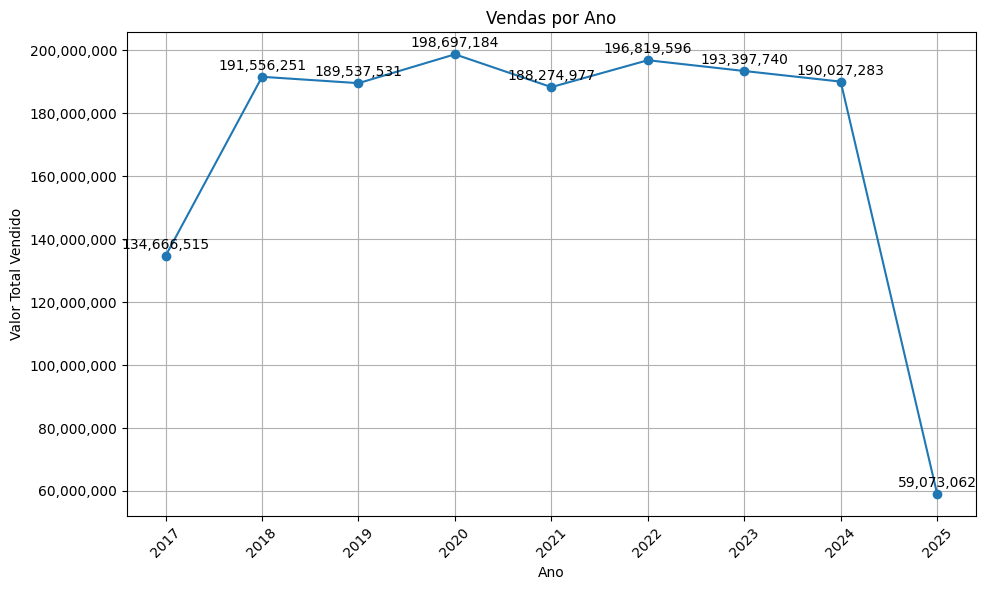

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(total_vendido_por_ano.index, total_vendido_por_ano.values, marker='o')
plt.title('Vendas por Ano')
plt.xlabel('Ano')
plt.ylabel('Valor Total Vendido')


formatter = ticker.StrMethodFormatter('{x:,.0f}')  # Formata como float com separador e 0 decimais
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)

# Adicionar os valores nos pontos da linha
for ano, venda in total_vendido_por_ano.items():
    plt.annotate(f'{venda:,.0f}',
                 (ano, venda),
                 textcoords="offset points",
                 xytext=(0, 5),
                 ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Resposta: Houve crescimento em alguns anos, em alguns anos alguns quedas, em geral se manteve variando entre 188 milhões e 198 milhões, então a maior variação que teve, seja para um valor maior ou menor, foi de cerca de 5%. Para saber se uma variação de 5% nesse tipo de mercado é algo para se alertar ou algo comum, seria necessário dados de outras empresas.

##2.2 - Segmentação

* Qual a forma de pagamento mais comum?

In [ ]:
formas_pagamento = df.groupby('Forma_pagamento').size().sort_values(ascending=False)
formas_pagamento.head()


,0
Forma_pagamento,
Consórcio,3786
Financiamento,3576
À vista,3280
Leasing,308


In [ ]:
pagamento_mais_comum = formas_pagamento.idxmax()
print(f'A forma de pagamento mais comum é {pagamento_mais_comum}')

A forma de pagamento mais comum é Consórcio


* Qual a média de valor de venda por estado?

In [ ]:
media_vendas_estado = df.groupby('Estado')['Valor_venda'].mean().apply(lambda x: formata_br(x))
media_vendas_estado

,Valor_venda
Estado,
AC,"142.010,22"
AL,"143.969,61"
AM,"141.812,54"
AP,"144.193,66"
BA,"136.554,12"
CE,"139.658,08"
DF,"141.089,43"
ES,"137.660,04"
GO,"137.754,09"


* Qual a marca mais vendida para clientes com idade entre 30 e 40 anos?

In [ ]:
mais_vendida = df.query('30 <= Idade <= 40').groupby('Marca').size().idxmax()
print(f'A marca mais vendida para clientes com idade entre 30 e 40 anos é a {mais_vendida}')

A marca mais vendida para clientes com idade entre 30 e 40 anos é a Toyota


##2.3 - Correlações

* Existe relação entre a idade do comprador e o valor do veículo?

In [ ]:
correlacao = df['Idade'].corr(df['Valor_venda'])
print(f'A correlação entre a idade do comprador e o valor do veículo é de {correlacao:.2f}')

A correlação entre a idade do comprador e o valor do veículo é de -0.00


Não há correlação entre a idade do comprador e o valor do veículo

* Há diferença no valor médio de venda entre homens e mulheres?

In [ ]:
valor_medio_venda = df.groupby('Sexo')['Valor_venda'].mean().apply(lambda x: formata_br(x))
valor_medio_venda

,Valor_venda
Sexo,
Feminino,"140.809,35"
Masculino,"140.854,75"


A diferença do valor médio de venda entre homens e mulhers é de apenas R$45,40

* Qual a cor de veículo mais popular por marca?

In [ ]:
cor_popular = df.groupby(['Marca', 'Cor']).size().groupby('Marca').apply(lambda x: x.sort_values(ascending=False).index[0][1])
cor_popular


,0
Marca,
Chevrolet,Cinza
Citroen,Branco
Fiat,Cinza
Ford,Branco
Honda,Branco
Hyundai,Branco
Jeep,Branco
Peugeot,Branco
Toyota,Cinza


#3 - Questões Avançadas (Análises Complexas)

##3.1 - Análise de Perfil

* Qual forma de pagamento é mais comum em cada faixa etária?

In [ ]:
# OBS: respondi essa questão primeiro apenas para conseguir deixar organizado melhor com subtitulos as avaliações por marcas abaixo

maior_idade = df['Idade'].max()
print(f'Maior idade da tabela:{maior_idade}')
menor_idade = df['Idade'].min()
print(f'Menor idade da tabela:{menor_idade}')

Maior idade da tabela:70
Menor idade da tabela:18


In [ ]:

faixa = ['[18-31[', '[31-44[', '[44-57[', '[57-70]']
# Bins determina o intervalo da categoria
df['faixa_etaria'] = pd.cut(df['Idade'], bins=[18,31,44,57,70], labels=faixa)


forma_pagamento = df.groupby(['faixa_etaria', 'Forma_pagamento']).size().groupby('faixa_etaria').apply(lambda x: x.sort_values(ascending=False).index[0][1])
forma_pagamento

<ipython-input-171-386288f00c38>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  forma_pagamento = df.groupby(['faixa_etaria', 'Forma_pagamento']).size().groupby('faixa_etaria').apply(lambda x: x.sort_values(ascending=False).index[0][1])
<ipython-input-171-386288f00c38>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  forma_pagamento = df.groupby(['faixa_etaria', 'Forma_pagamento']).size().groupby('faixa_etaria').apply(lambda x: x.sort_values(ascending=False).index[0][1])


,0
faixa_etaria,
[18-31[,Consórcio
[31-44[,Consórcio
[44-57[,Consórcio
[57-70],Financiamento


* Crie um perfil típico do comprador (idade, estado civil, estado) para cada marca.

In [ ]:
display(df['Marca'].unique())

array(['Toyota', 'Hyundai', 'Ford', 'Honda', 'Citroen', 'Peugeot', 'Fiat',
       'Volkswagen', 'Chevrolet', 'Jeep'], dtype=object)

####Análise de perfil para marca Toyota

In [ ]:
analise_toyota = df[df['Marca'] == 'Toyota'].copy()

idade_min_toyota = analise_toyota['Idade'].min()
idade_max_toyota =analise_toyota['Idade'].max()

print(f'A menor idade de comprador Toyota é {idade_min_toyota}')
print(f'A maior idade de comprador Toyota é {idade_max_toyota}')

A menor idade de comprador Toyota é 18
A maior idade de comprador Toyota é 70


In [ ]:
#DIVIDINDO AS IDADES EM INTERVALOS PARA VER COMO ESTÁ A DISTRIBUIÇÃO NESSES INTERVALOS

faixa_toyota = ['[18-31[', '[31-44[', '[44-57[', '[57-70]']
# Bins determina o intervalo da categoria
analise_toyota['faixa_etaria'] = pd.cut(analise_toyota['Idade'], bins=[18,31,44,57,70], labels=faixa)

contagem_faixa_etaria_toyota = analise_toyota['faixa_etaria'].value_counts()
porcentagem_faixa_etaria_toyota = (contagem_faixa_etaria_toyota / len(analise_toyota['faixa_etaria'])) * 100

print(porcentagem_faixa_etaria_toyota)


faixa_etaria
[57-70]   25.94
[18-31[   25.11
[44-57[   24.93
[31-44[   21.85
Name: count, dtype: float64


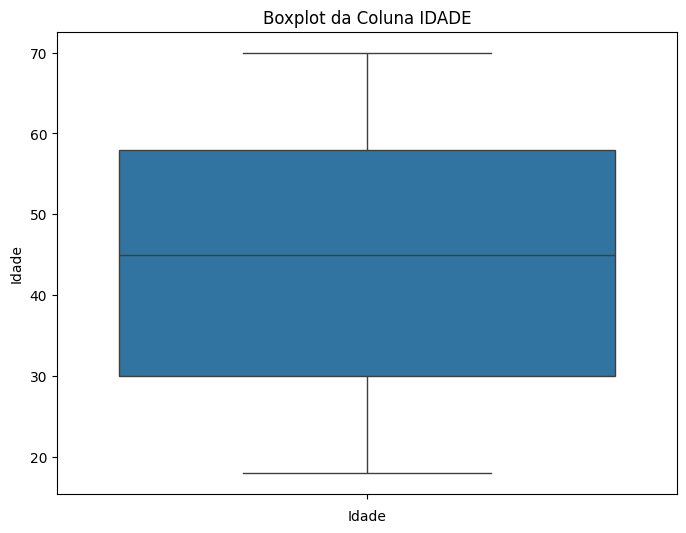

In [ ]:
#BOXPLOT PARA VERIFICAR SE HÁ OUTLIERS
plt.figure(figsize=(8, 6))
sns.boxplot(y=analise_toyota['Idade'])
plt.title('Boxplot da Coluna IDADE')
plt.xlabel('Idade')
plt.show()

In [ ]:
# VERIFICANDO MEDIDAS ESTATISTICAS DAS IDADES.
medidas_estatisticas_idade_toyota = analise_toyota['Idade'].describe()
print(medidas_estatisticas_idade_toyota)

count   2178.00
mean      44.38
std       15.49
min       18.00
25%       30.00
50%       45.00
75%       58.00
max       70.00
Name: Idade, dtype: float64


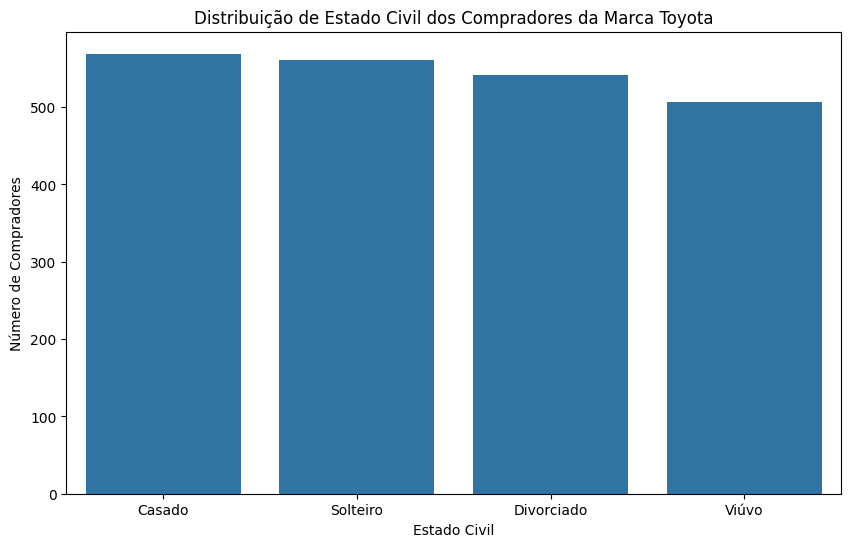

In [ ]:
#verificando distribuição de compradores por estado civil
contagem_estado_civil_toyota = analise_toyota['Estado Civil'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_toyota, x='Estado Civil', order=contagem_estado_civil_toyota.index)
plt.title('Distribuição de Estado Civil dos Compradores da Marca Toyota')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compradores')
plt.show()

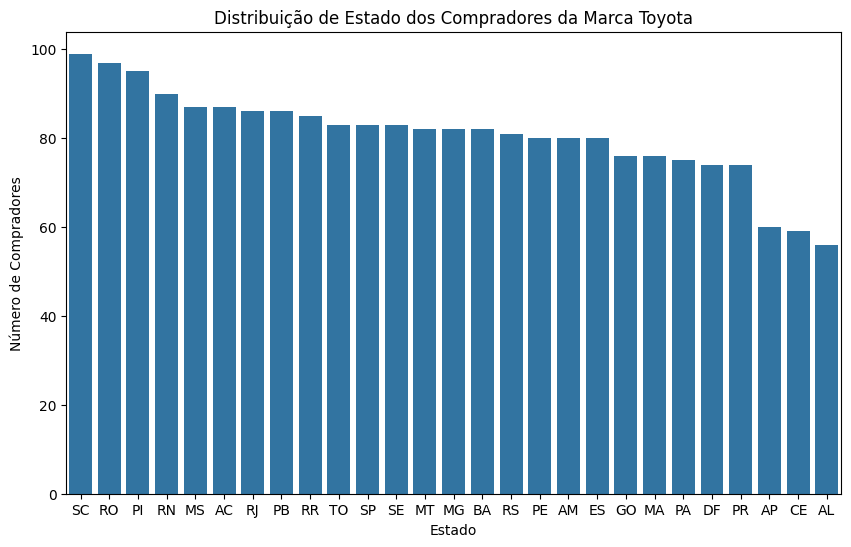

In [ ]:
#verificando distribuição de compradores por estado
contagem_estado_toyota = analise_toyota['Estado'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_toyota, x='Estado', order=contagem_estado_toyota.index)
plt.title('Distribuição de Estado dos Compradores da Marca Toyota')
plt.xlabel('Estado')
plt.ylabel('Número de Compradores')
plt.show()

**ANÁLISE TOYOTA:**

As idades estão bem dividas entre os intervalos, e não tem outliers, nesse caso vou utilizar a média de idade como o perfil de idade dos compradores. A distruibuição por Estado Civil está bem dividida, então já podemos utilizar o Estado civil que mais comprou o carro. A distribuição por Estado já possui uma diferença maior, mas não há estados que sejam casos isolados, com poucas vendas. Também será utilizado o Estado com Maior Venda.

**PERFIL DO COMPRADOR DE TOYOTA:**

IDADE MÉDIA: 44 ANOS

ESTADO CIVIL MAIS COMUM: CASADO

ESTADO MAIS COMUM: SANTA CATARINA (SC)

####Análise de perfil para marca Hyundai

In [ ]:
analise_hyundai = df[df['Marca'] == 'Hyundai'].copy()

idade_min_hyundai = analise_hyundai['Idade'].min()
idade_max_hyundai =analise_hyundai['Idade'].max()

print(f'A menor idade de comprador hyundai é {idade_min_hyundai}')
print(f'A maior idade de comprador hyundai é {idade_max_hyundai}')

A menor idade de comprador hyundai é 18
A maior idade de comprador hyundai é 70


In [ ]:
#DIVIDINDO AS IDADES EM INTERVALOS PARA VER COMO ESTÁ A DISTRIBUIÇÃO NESSES INTERVALOS

faixa_hyundai = ['[18-31[', '[31-44[', '[44-57[', '[57-70]']
# Bins determina o intervalo da categoria
analise_hyundai['faixa_etaria'] = pd.cut(analise_hyundai['Idade'], bins=[18,31,44,57,70], labels=faixa)

contagem_faixa_etaria_hyundai = analise_hyundai['faixa_etaria'].value_counts()
porcentagem_faixa_etaria_hyundai = (contagem_faixa_etaria_hyundai / len(analise_hyundai['faixa_etaria'])) * 100

print(porcentagem_faixa_etaria_hyundai)


faixa_etaria
[44-57[   27.19
[31-44[   23.91
[57-70]   23.91
[18-31[   22.81
Name: count, dtype: float64


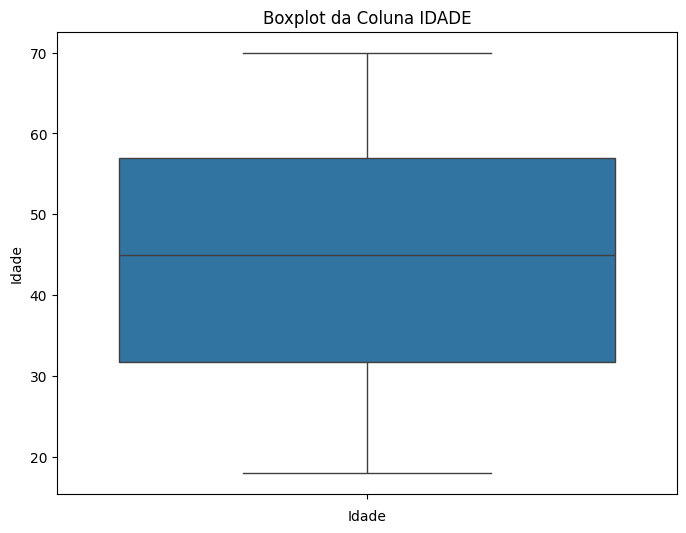

In [ ]:
#BOXPLOT PARA VERIFICAR SE HÁ OUTLIERS
plt.figure(figsize=(8, 6))
sns.boxplot(y=analise_hyundai['Idade'])
plt.title('Boxplot da Coluna IDADE')
plt.xlabel('Idade')
plt.show()

In [ ]:
# VERIFICANDO MEDIDAS ESTATISTICAS DAS IDADES.
medidas_estatisticas_idade_hyundai = analise_hyundai['Idade'].describe()
print(medidas_estatisticas_idade_hyundai)

count   640.00
mean     44.42
std      15.15
min      18.00
25%      31.75
50%      45.00
75%      57.00
max      70.00
Name: Idade, dtype: float64


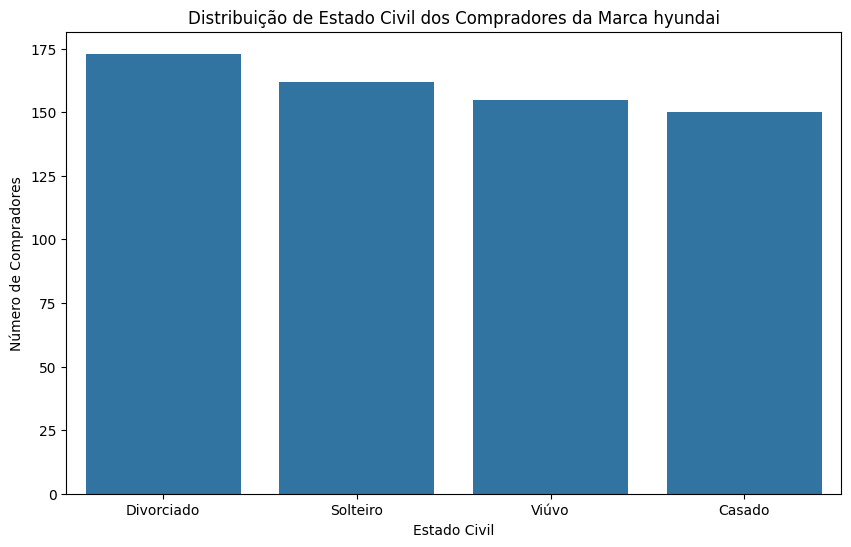

In [ ]:
#verificando distribuição de compradores por estado civil
contagem_estado_civil_hyundai = analise_hyundai['Estado Civil'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_hyundai, x='Estado Civil', order=contagem_estado_civil_hyundai.index)
plt.title('Distribuição de Estado Civil dos Compradores da Marca hyundai')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compradores')
plt.show()

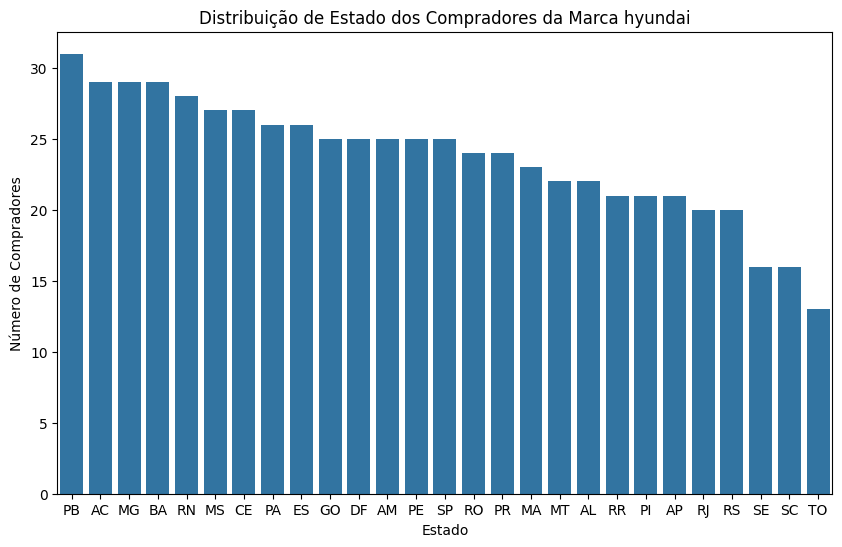

In [ ]:
#verificando distribuição de compradores por estado
contagem_estado_hyundai = analise_hyundai['Estado'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_hyundai, x='Estado', order=contagem_estado_hyundai.index)
plt.title('Distribuição de Estado dos Compradores da Marca hyundai')
plt.xlabel('Estado')
plt.ylabel('Número de Compradores')
plt.show()

**ANÁLISE Hyundai:**

As idades estão bem dividas entre os intervalos, e não tem outliers, nesse caso vou utilizar a média de idade como o perfil de idade dos compradores. A distruibuição por Estado Civil está bem dividida, então já podemos utilizar o Estado civil que mais comprou o carro. A distribuição por Estado já possui uma diferença maior, mas não há estados que sejam casos isolados, com poucas vendas. Também será utilizado o Estado com Maior Venda.

**PERFIL DO COMPRADOR DE HYUNDAI:**

IDADE MÉDIA: 44 ANOS

ESTADO CIVIL MAIS COMUM: DIVORCIADO

ESTADO MAIS COMUM: PARAÍBA (PB)

####Análise de perfil para marca Ford

In [ ]:
analise_ford = df[df['Marca'] == 'Ford'].copy()

idade_min_ford = analise_ford['Idade'].min()
idade_max_ford =analise_ford['Idade'].max()

print(f'A menor idade de comprador Ford é {idade_min_ford}')
print(f'A maior idade de comprador Ford é {idade_max_ford}')

A menor idade de comprador Ford é 18
A maior idade de comprador Ford é 70


In [ ]:
#DIVIDINDO AS IDADES EM INTERVALOS PARA VER COMO ESTÁ A DISTRIBUIÇÃO NESSES INTERVALOS

faixa_ford = ['[18-31[', '[31-44[', '[44-57[', '[57-70]']
# Bins determina o intervalo da categoria
analise_ford['faixa_etaria'] = pd.cut(analise_ford['Idade'], bins=[18,31,44,57,70], labels=faixa)

contagem_faixa_etaria_ford = analise_ford['faixa_etaria'].value_counts()
porcentagem_faixa_etaria_ford = (contagem_faixa_etaria_ford / len(analise_ford['faixa_etaria'])) * 100

print(porcentagem_faixa_etaria_ford)

faixa_etaria
[57-70]   25.25
[18-31[   24.57
[44-57[   24.52
[31-44[   24.05
Name: count, dtype: float64


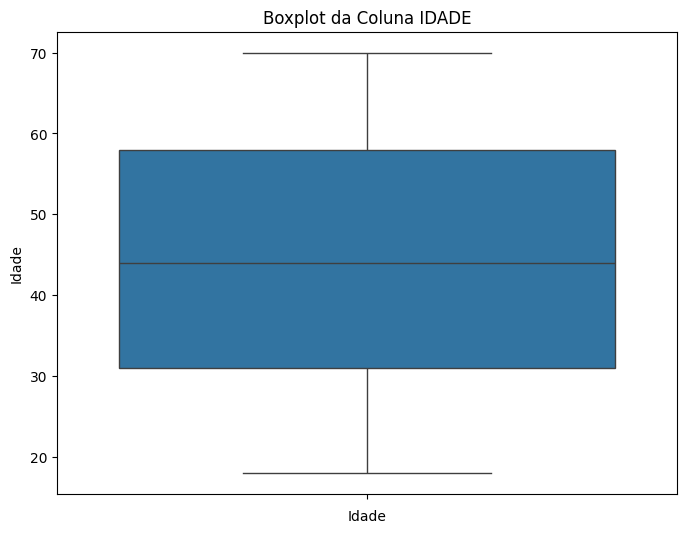

In [ ]:
#BOXPLOT PARA VERIFICAR SE HÁ OUTLIERS
plt.figure(figsize=(8, 6))
sns.boxplot(y=analise_ford['Idade'])
plt.title('Boxplot da Coluna IDADE')
plt.xlabel('Idade')
plt.show()

In [ ]:
# VERIFICANDO MEDIDAS ESTATISTICAS DAS IDADES.
medidas_estatisticas_idade_toyota = analise_toyota['Idade'].describe()
print(medidas_estatisticas_idade_toyota)

count   2178.00
mean      44.38
std       15.49
min       18.00
25%       30.00
50%       45.00
75%       58.00
max       70.00
Name: Idade, dtype: float64


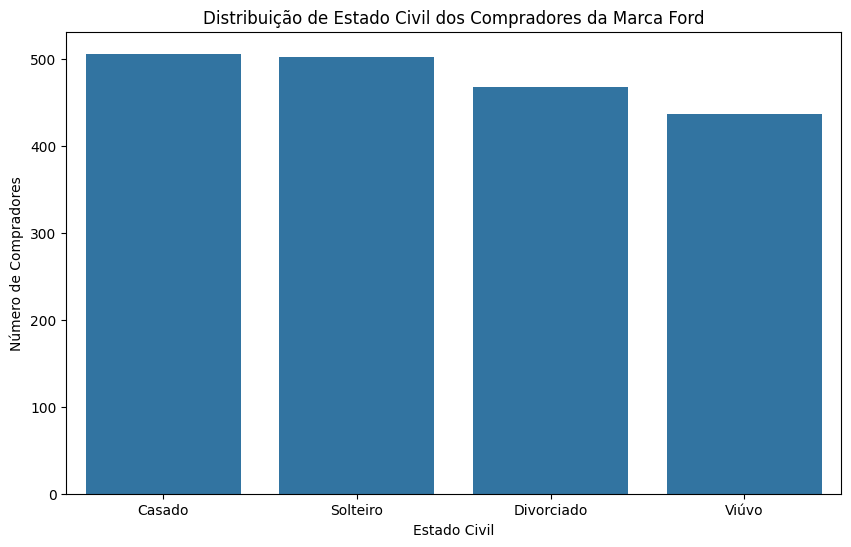

In [ ]:
#verificando distribuição de compradores por estado civil
contagem_estado_civil_ford = analise_ford['Estado Civil'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_ford, x='Estado Civil', order=contagem_estado_civil_ford.index)
plt.title('Distribuição de Estado Civil dos Compradores da Marca Ford')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compradores')
plt.show()

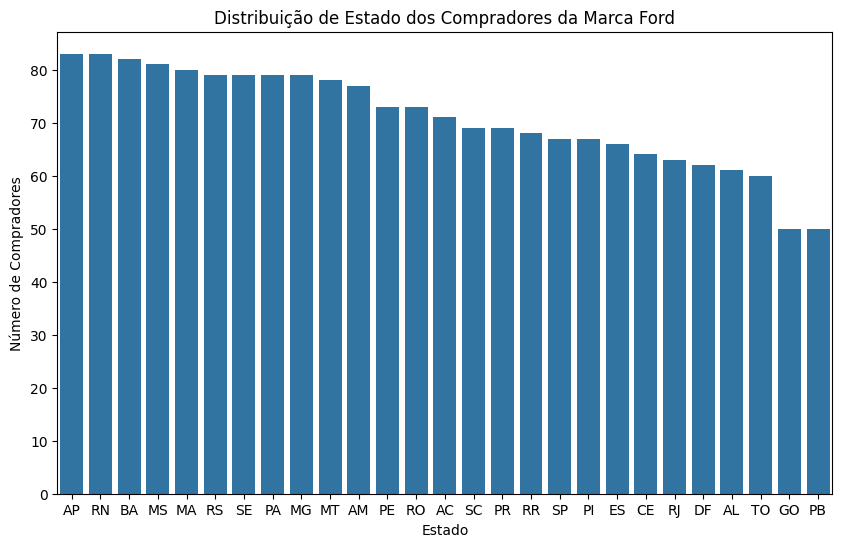

In [ ]:
#verificando distribuição de compradores por estado
contagem_estado_ford = analise_ford['Estado'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_ford, x='Estado', order=contagem_estado_ford.index)
plt.title('Distribuição de Estado dos Compradores da Marca Ford')
plt.xlabel('Estado')
plt.ylabel('Número de Compradores')
plt.show()

**ANÁLISE TOYOTA:**

As idades estão bem dividas entre os intervalos, e não tem outliers, nesse caso vou utilizar a média de idade como o perfil de idade dos compradores. A distruibuição por Estado Civil está bem dividida, então já podemos utilizar o Estado civil que mais comprou o carro. A distribuição por Estado já possui uma diferença maior, mas não há estados que sejam casos isolados, com poucas vendas. Também será utilizado o Estado com Maior Venda.

**PERFIL DO COMPRADOR DE FORD:**

IDADE MÉDIA: 44 ANOS

ESTADO CIVIL MAIS COMUM: CASADO

ESTADO MAIS COMUM: AMAPÁ (AP)

####Análise de perfil para marca Honda

In [ ]:
analise_honda = df[df['Marca'] == 'Honda'].copy()

idade_min_honda = analise_honda['Idade'].min()
idade_max_honda =analise_honda['Idade'].max()

print(f'A menor idade de comprador Honda é {idade_min_honda}')
print(f'A maior idade de comprador Honda é {idade_max_honda}')

A menor idade de comprador Honda é 18
A maior idade de comprador Honda é 70


In [ ]:
#DIVIDINDO AS IDADES EM INTERVALOS PARA VER COMO ESTÁ A DISTRIBUIÇÃO NESSES INTERVALOS

faixa_honda = ['[18-31[', '[31-44[', '[44-57[', '[57-70]']
# Bins determina o intervalo da categoria
analise_honda['faixa_etaria'] = pd.cut(analise_honda['Idade'], bins=[18,31,44,57,70], labels=faixa)

contagem_faixa_etaria_honda = analise_honda['faixa_etaria'].value_counts()
porcentagem_faixa_etaria_honda = (contagem_faixa_etaria_honda / len(analise_honda['faixa_etaria'])) * 100

print(porcentagem_faixa_etaria_honda)

faixa_etaria
[44-57[   25.53
[57-70]   25.07
[31-44[   24.87
[18-31[   22.83
Name: count, dtype: float64


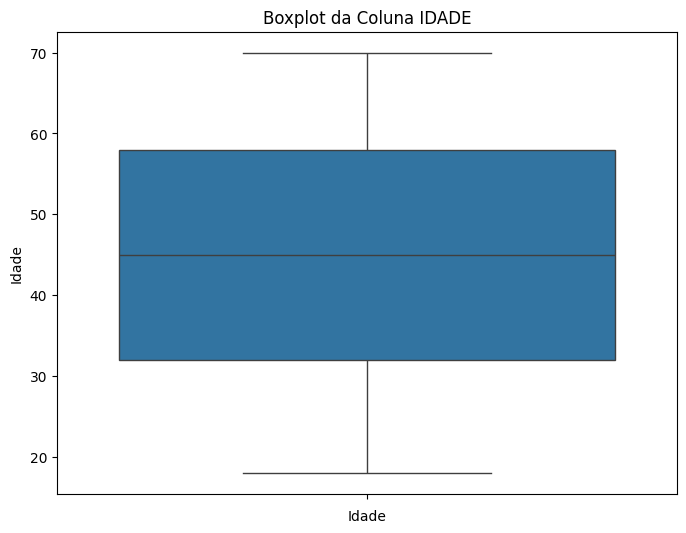

In [ ]:
#BOXPLOT PARA VERIFICAR SE HÁ OUTLIERS
plt.figure(figsize=(8, 6))
sns.boxplot(y=analise_honda['Idade'])
plt.title('Boxplot da Coluna IDADE')
plt.xlabel('Idade')
plt.show()

In [ ]:
# VERIFICANDO MEDIDAS ESTATISTICAS DAS IDADES.
medidas_estatisticas_idade_honda = analise_honda['Idade'].describe()
print(medidas_estatisticas_idade_honda)

count   1520.00
mean      44.59
std       15.30
min       18.00
25%       32.00
50%       45.00
75%       58.00
max       70.00
Name: Idade, dtype: float64


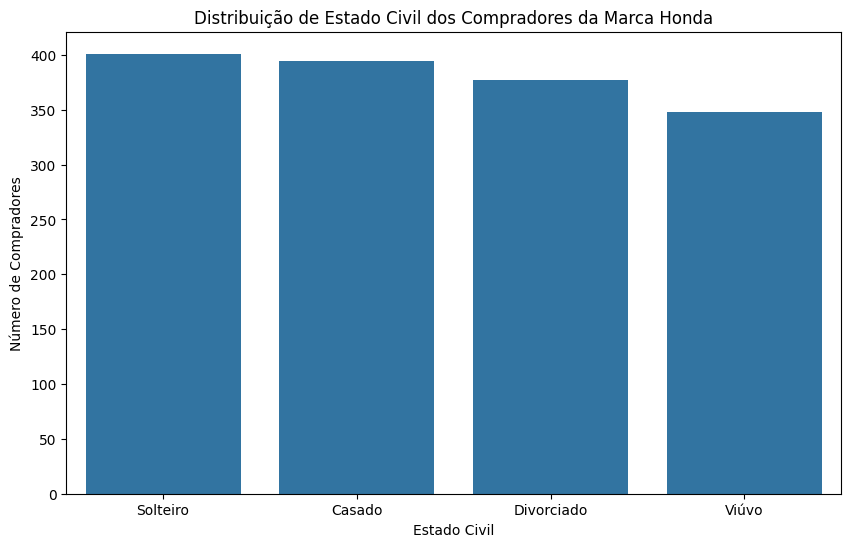

In [ ]:
#verificando distribuição de compradores por estado civil
contagem_estado_civil_honda = analise_honda['Estado Civil'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_honda, x='Estado Civil', order=contagem_estado_civil_honda.index)
plt.title('Distribuição de Estado Civil dos Compradores da Marca Honda')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compradores')
plt.show()

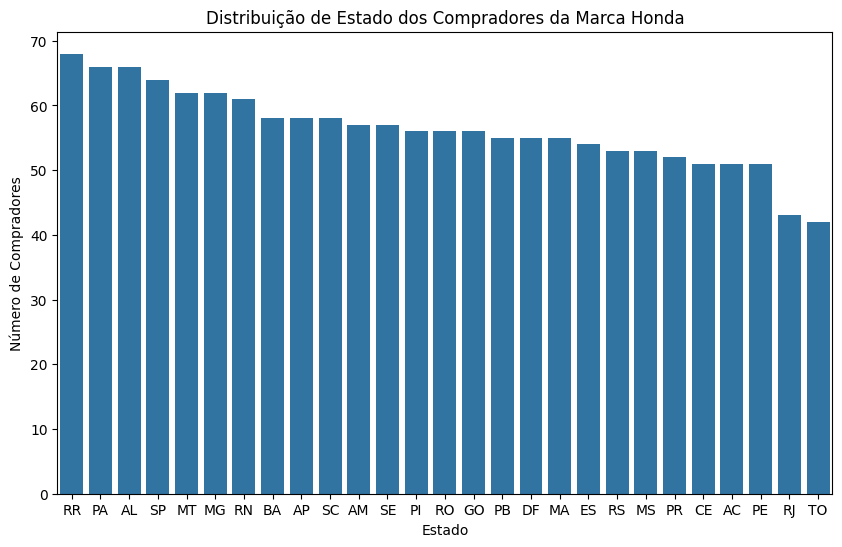

In [ ]:
#verificando distribuição de compradores por estado
contagem_estado_honda = analise_honda['Estado'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_honda, x='Estado', order=contagem_estado_honda.index)
plt.title('Distribuição de Estado dos Compradores da Marca Honda')
plt.xlabel('Estado')
plt.ylabel('Número de Compradores')
plt.show()

**ANÁLISE HONDA:**

As idades estão bem dividas entre os intervalos, e não tem outliers, nesse caso vou utilizar a média de idade como o perfil de idade dos compradores. A distruibuição por Estado Civil está bem dividida, então já podemos utilizar o Estado civil que mais comprou o carro. A distribuição por Estado já possui uma diferença maior, mas não há estados que sejam casos isolados, com poucas vendas. Também será utilizado o Estado com Maior Venda.

**PERFIL DO COMPRADOR DE HONDA:**

IDADE MÉDIA: 44 ANOS

ESTADO CIVIL MAIS COMUM: SOLTEIRO

ESTADO MAIS COMUM:RORAIMA (RR)

####Análise de perfil para marca Citroen

In [ ]:
analise_citroen = df[df['Marca'] == 'Citroen'].copy()

idade_min_citroen = analise_citroen['Idade'].min()
idade_max_citroen =analise_citroen['Idade'].max()

print(f'A menor idade de comprador Citroen é {idade_min_citroen}')
print(f'A maior idade de comprador Citroen é {idade_max_citroen}')

A menor idade de comprador Citroen é 18
A maior idade de comprador Citroen é 70


In [ ]:
#DIVIDINDO AS IDADES EM INTERVALOS PARA VER COMO ESTÁ A DISTRIBUIÇÃO NESSES INTERVALOS

faixa_citroen = ['[18-31[', '[31-44[', '[44-57[', '[57-70]']
# Bins determina o intervalo da categoria
analise_citroen['faixa_etaria'] = pd.cut(analise_citroen['Idade'], bins=[18,31,44,57,70], labels=faixa)

contagem_faixa_etaria_citroen = analise_citroen['faixa_etaria'].value_counts()
porcentagem_faixa_etaria_citroen = (contagem_faixa_etaria_citroen / len(analise_citroen['faixa_etaria'])) * 100

print(porcentagem_faixa_etaria_citroen)

faixa_etaria
[18-31[   26.55
[31-44[   26.55
[44-57[   24.35
[57-70]   20.76
Name: count, dtype: float64


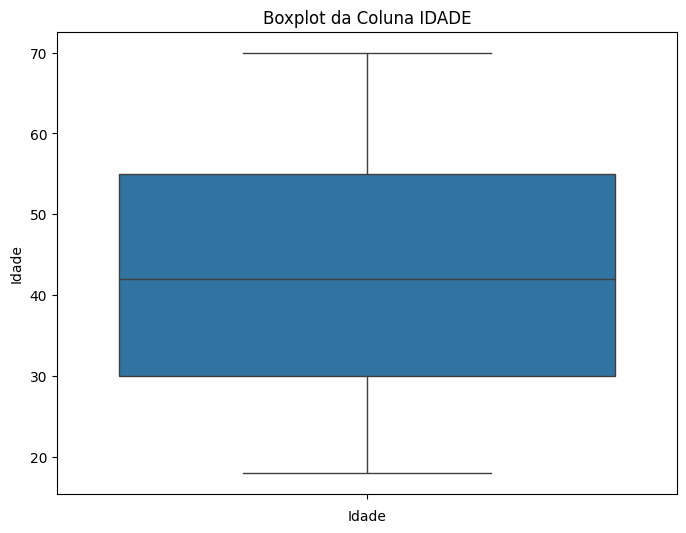

In [ ]:
#BOXPLOT PARA VERIFICAR SE HÁ OUTLIERS
plt.figure(figsize=(8, 6))
sns.boxplot(y=analise_citroen['Idade'])
plt.title('Boxplot da Coluna IDADE')
plt.xlabel('Idade')
plt.show()

In [ ]:
# VERIFICANDO MEDIDAS ESTATISTICAS DAS IDADES.
medidas_estatisticas_idade_citroen = analise_citroen['Idade'].describe()
print(medidas_estatisticas_idade_citroen)

count   501.00
mean     42.87
std      14.93
min      18.00
25%      30.00
50%      42.00
75%      55.00
max      70.00
Name: Idade, dtype: float64


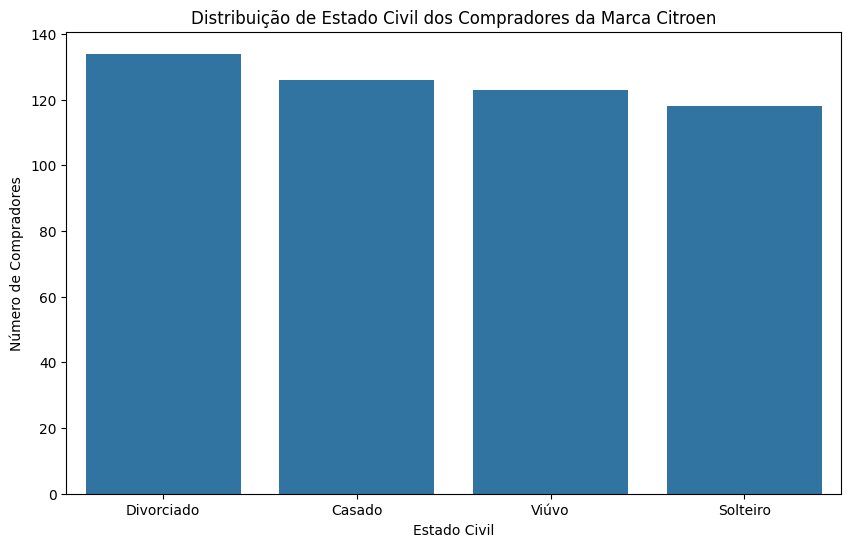

In [ ]:
#verificando distribuição de compradores por estado civil
contagem_estado_civil_citroen = analise_citroen['Estado Civil'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_citroen, x='Estado Civil', order=contagem_estado_civil_citroen.index)
plt.title('Distribuição de Estado Civil dos Compradores da Marca Citroen')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compradores')
plt.show()

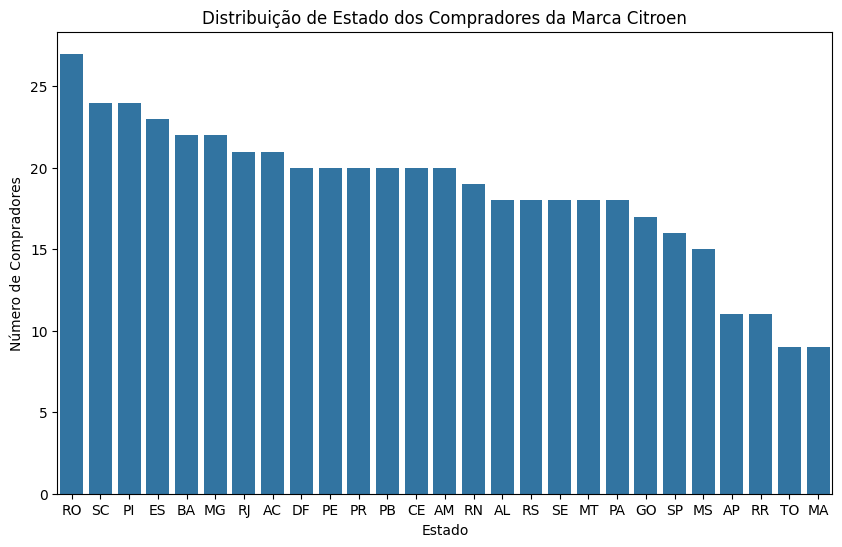

In [ ]:
#verificando distribuição de compradores por estado
contagem_estado_citroen = analise_citroen['Estado'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_citroen, x='Estado', order=contagem_estado_citroen.index)
plt.title('Distribuição de Estado dos Compradores da Marca Citroen')
plt.xlabel('Estado')
plt.ylabel('Número de Compradores')
plt.show()

**ANÁLISE CITROEN:**

As idades estão bem dividas entre os intervalos, e não tem outliers, nesse caso vou utilizar a média de idade como o perfil de idade dos compradores. A distruibuição por Estado Civil está bem dividida, então já podemos utilizar o Estado civil que mais comprou o carro. A distribuição por Estado já possui uma diferença maior, mas não há estados que sejam casos isolados, com poucas vendas. Também será utilizado o Estado com Maior Venda.

**PERFIL DO COMPRADOR DE CITROEN:**

IDADE MÉDIA: 42 ANOS

ESTADO CIVIL MAIS COMUM: DIVORCIADO

ESTADO MAIS COMUM: RONDÔNIA (RO)

####Análise de perfil para marca Peugeot

In [ ]:
analise_peugeot = df[df['Marca'] == 'Peugeot'].copy()

idade_min_peugeot = analise_peugeot['Idade'].min()
idade_max_peugeot =analise_peugeot['Idade'].max()

print(f'A menor idade de comprador Peugeot é {idade_min_peugeot}')
print(f'A maior idade de comprador Peugeot é {idade_max_peugeot}')

A menor idade de comprador Peugeot é 18
A maior idade de comprador Peugeot é 70


In [ ]:
#DIVIDINDO AS IDADES EM INTERVALOS PARA VER COMO ESTÁ A DISTRIBUIÇÃO NESSES INTERVALOS

faixa_peugeot = ['[18-31[', '[31-44[', '[44-57[', '[57-70]']
# Bins determina o intervalo da categoria
analise_peugeot['faixa_etaria'] = pd.cut(analise_peugeot['Idade'], bins=[18,31,44,57,70], labels=faixa)

contagem_faixa_etaria_peugeot = analise_peugeot['faixa_etaria'].value_counts()
porcentagem_faixa_etaria_peugeot = (contagem_faixa_etaria_peugeot / len(analise_peugeot['faixa_etaria'])) * 100

print(porcentagem_faixa_etaria_peugeot)

faixa_etaria
[18-31[   25.45
[31-44[   25.39
[57-70]   24.67
[44-57[   22.21
Name: count, dtype: float64


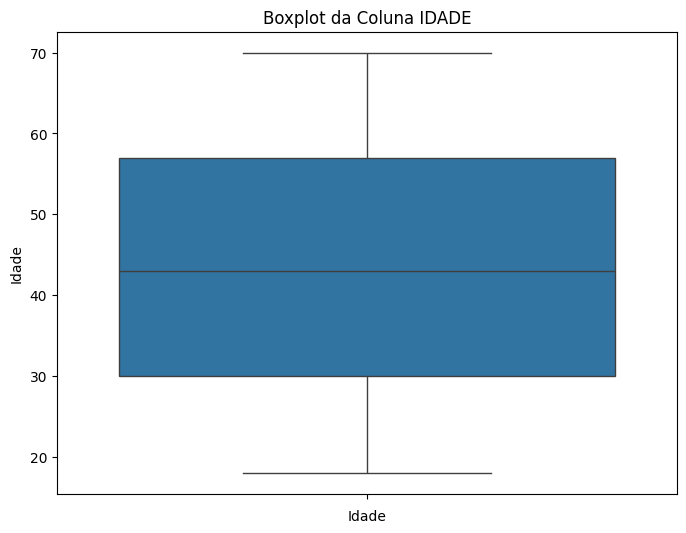

In [ ]:
#BOXPLOT PARA VERIFICAR SE HÁ OUTLIERS
plt.figure(figsize=(8, 6))
sns.boxplot(y=analise_peugeot['Idade'])
plt.title('Boxplot da Coluna IDADE')
plt.xlabel('Idade')
plt.show()

In [ ]:
# VERIFICANDO MEDIDAS ESTATISTICAS DAS IDADES.
medidas_estatisticas_idade_peugeot = analise_peugeot['Idade'].describe()
print(medidas_estatisticas_idade_peugeot)

count   1666.00
mean      43.56
std       15.60
min       18.00
25%       30.00
50%       43.00
75%       57.00
max       70.00
Name: Idade, dtype: float64


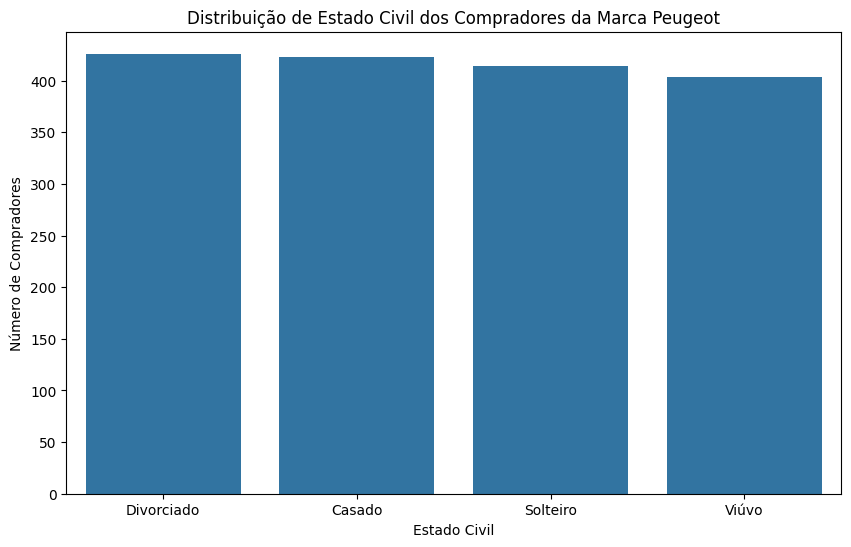

In [ ]:
#verificando distribuição de compradores por estado civil
contagem_estado_civil_peugeot = analise_peugeot['Estado Civil'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_peugeot, x='Estado Civil', order=contagem_estado_civil_peugeot.index)
plt.title('Distribuição de Estado Civil dos Compradores da Marca Peugeot')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compradores')
plt.show()

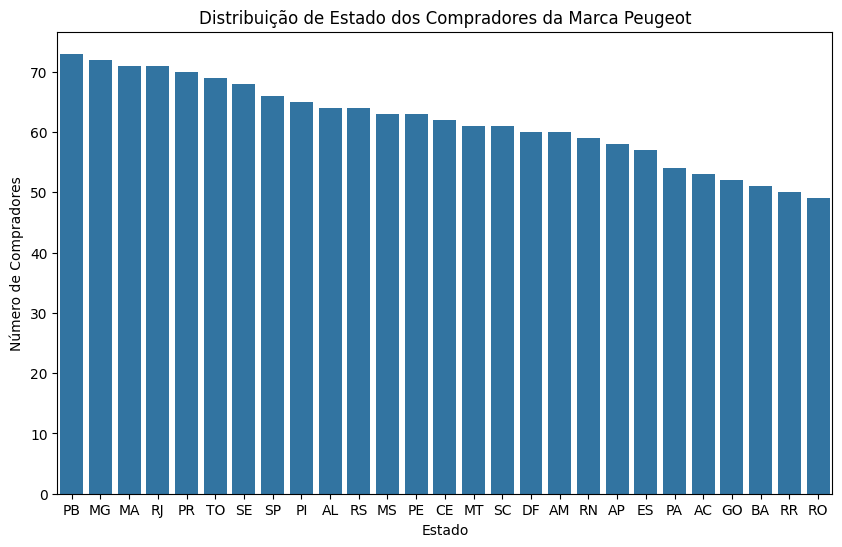

In [ ]:
#verificando distribuição de compradores por estado
contagem_estado_peugeot = analise_peugeot['Estado'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_peugeot, x='Estado', order=contagem_estado_peugeot.index)
plt.title('Distribuição de Estado dos Compradores da Marca Peugeot')
plt.xlabel('Estado')
plt.ylabel('Número de Compradores')
plt.show()

**ANÁLISE PEUGEOT:**

As idades estão bem dividas entre os intervalos, e não tem outliers, nesse caso vou utilizar a média de idade como o perfil de idade dos compradores. A distruibuição por Estado Civil está bem dividida, então já podemos utilizar o Estado civil que mais comprou o carro. A distribuição por Estado já possui uma diferença maior, mas não há estados que sejam casos isolados, com poucas vendas. Também será utilizado o Estado com Maior Venda.

**PERFIL DO COMPRADOR DE PEUGEOT:**

IDADE MÉDIA: 43 ANOS

ESTADO CIVIL MAIS COMUM: DIVORCIADO

ESTADO MAIS COMUM: PARAÍBA (PB)

####Análise de perfil para marca Fiat

In [ ]:
analise_fiat = df[df['Marca'] == 'Fiat'].copy()

idade_min_fiat = analise_fiat['Idade'].min()
idade_max_fiat =analise_fiat['Idade'].max()

print(f'A menor idade de comprador Fiat é {idade_min_fiat}')
print(f'A maior idade de comprador Fiat é {idade_max_fiat}')

A menor idade de comprador Fiat é 18
A maior idade de comprador Fiat é 70


In [ ]:
#DIVIDINDO AS IDADES EM INTERVALOS PARA VER COMO ESTÁ A DISTRIBUIÇÃO NESSES INTERVALOS

faixa_fiat = ['[18-31[', '[31-44[', '[44-57[', '[57-70]']
# Bins determina o intervalo da categoria
analise_fiat['faixa_etaria'] = pd.cut(analise_fiat['Idade'], bins=[18,31,44,57,70], labels=faixa)

contagem_faixa_etaria_fiat = analise_fiat['faixa_etaria'].value_counts()
porcentagem_faixa_etaria_fiat = (contagem_faixa_etaria_fiat / len(analise_fiat['faixa_etaria'])) * 100

print(porcentagem_faixa_etaria_fiat)

faixa_etaria
[57-70]   26.05
[44-57[   25.06
[31-44[   24.39
[18-31[   22.85
Name: count, dtype: float64


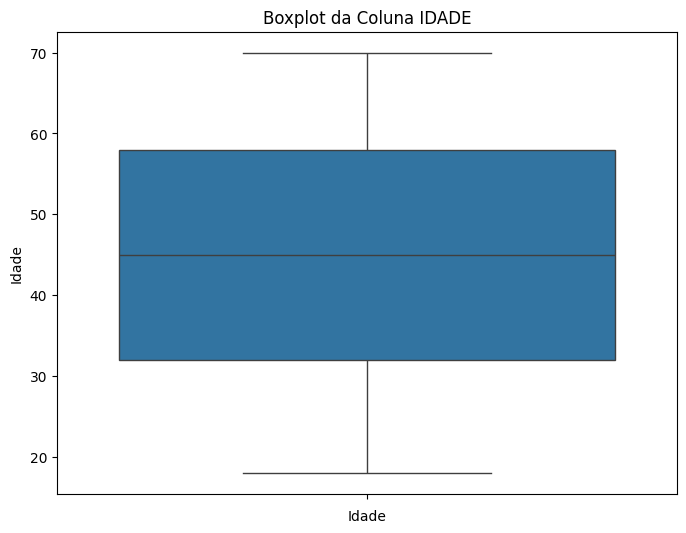

In [ ]:
#BOXPLOT PARA VERIFICAR SE HÁ OUTLIERS
plt.figure(figsize=(8, 6))
sns.boxplot(y=analise_fiat['Idade'])
plt.title('Boxplot da Coluna IDADE')
plt.xlabel('Idade')
plt.show()

In [ ]:
# VERIFICANDO MEDIDAS ESTATISTICAS DAS IDADES.
medidas_estatisticas_idade_fiat = analise_fiat['Idade'].describe()
print(medidas_estatisticas_idade_fiat)

count   906.00
mean     44.70
std      15.33
min      18.00
25%      32.00
50%      45.00
75%      58.00
max      70.00
Name: Idade, dtype: float64


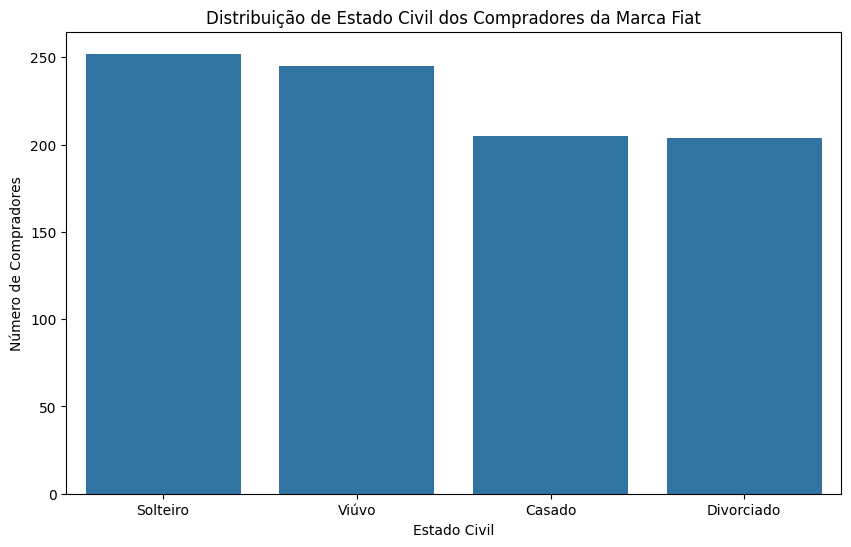

In [ ]:
#verificando distribuição de compradores por estado civil
contagem_estado_civil_fiat = analise_fiat['Estado Civil'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_fiat, x='Estado Civil', order=contagem_estado_civil_fiat.index)
plt.title('Distribuição de Estado Civil dos Compradores da Marca Fiat')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compradores')
plt.show()

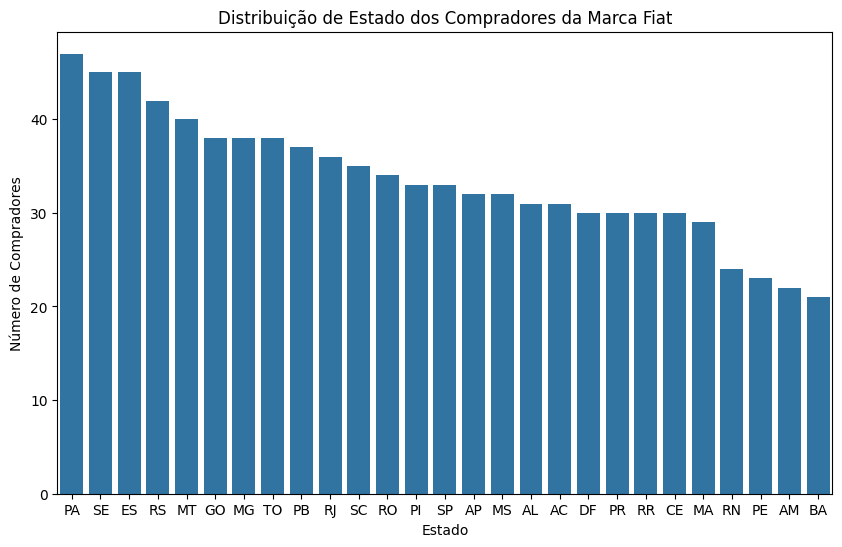

In [ ]:
#verificando distribuição de compradores por estado
contagem_estado_fiat = analise_fiat['Estado'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_fiat, x='Estado', order=contagem_estado_fiat.index)
plt.title('Distribuição de Estado dos Compradores da Marca Fiat')
plt.xlabel('Estado')
plt.ylabel('Número de Compradores')
plt.show()

**ANÁLISE FIAT:**

As idades estão bem dividas entre os intervalos, e não tem outliers, nesse caso vou utilizar a média de idade como o perfil de idade dos compradores. A distruibuição por Estado Civil está bem dividida, então já podemos utilizar o Estado civil que mais comprou o carro. A distribuição por Estado já possui uma diferença maior, mas não há estados que sejam casos isolados, com poucas vendas. Também será utilizado o Estado com Maior Venda.

**PERFIL DO COMPRADOR DE FIAT:**

IDADE MÉDIA: 44 ANOS

ESTADO CIVIL MAIS COMUM: SOLTEIRO

ESTADO MAIS COMUM: PARÁ (PA)

####Análise de perfil para marca Volkswagen

In [ ]:
analise_volkswagen = df[df['Marca'] == 'Volkswagen'].copy()

idade_min_volkswagen = analise_volkswagen['Idade'].min()
idade_max_volkswagen =analise_volkswagen['Idade'].max()

print(f'A menor idade de comprador Volkswagen é {idade_min_volkswagen}')
print(f'A maior idade de comprador Volkswagen é {idade_max_volkswagen}')

A menor idade de comprador Volkswagen é 18
A maior idade de comprador Volkswagen é 70


In [ ]:
#DIVIDINDO AS IDADES EM INTERVALOS PARA VER COMO ESTÁ A DISTRIBUIÇÃO NESSES INTERVALOS

faixa_volkswagen = ['[18-31[', '[31-44[', '[44-57[', '[57-70]']
# Bins determina o intervalo da categoria
analise_volkswagen['faixa_etaria'] = pd.cut(analise_volkswagen['Idade'], bins=[18,31,44,57,70], labels=faixa)

contagem_faixa_etaria_volkswagen = analise_volkswagen['faixa_etaria'].value_counts()
porcentagem_faixa_etaria_volkswagen = (contagem_faixa_etaria_volkswagen / len(analise_volkswagen['faixa_etaria'])) * 100

print(porcentagem_faixa_etaria_volkswagen)

faixa_etaria
[57-70]   25.71
[44-57[   24.90
[31-44[   23.77
[18-31[   23.36
Name: count, dtype: float64


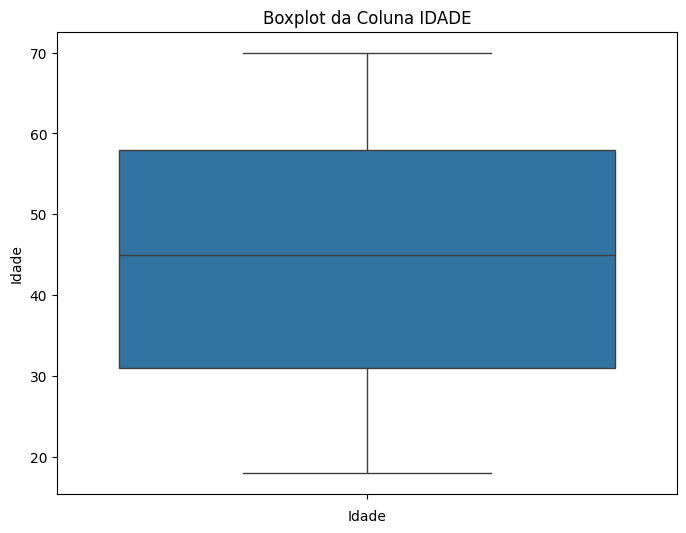

In [ ]:
#BOXPLOT PARA VERIFICAR SE HÁ OUTLIERS
plt.figure(figsize=(8, 6))
sns.boxplot(y=analise_volkswagen['Idade'])
plt.title('Boxplot da Coluna IDADE')
plt.xlabel('Idade')
plt.show()

In [ ]:
# VERIFICANDO MEDIDAS ESTATISTICAS DAS IDADES.
medidas_estatisticas_idade_volkswagen = analise_volkswagen['Idade'].describe()
print(medidas_estatisticas_idade_volkswagen)

count   1237.00
mean      44.43
std       15.38
min       18.00
25%       31.00
50%       45.00
75%       58.00
max       70.00
Name: Idade, dtype: float64


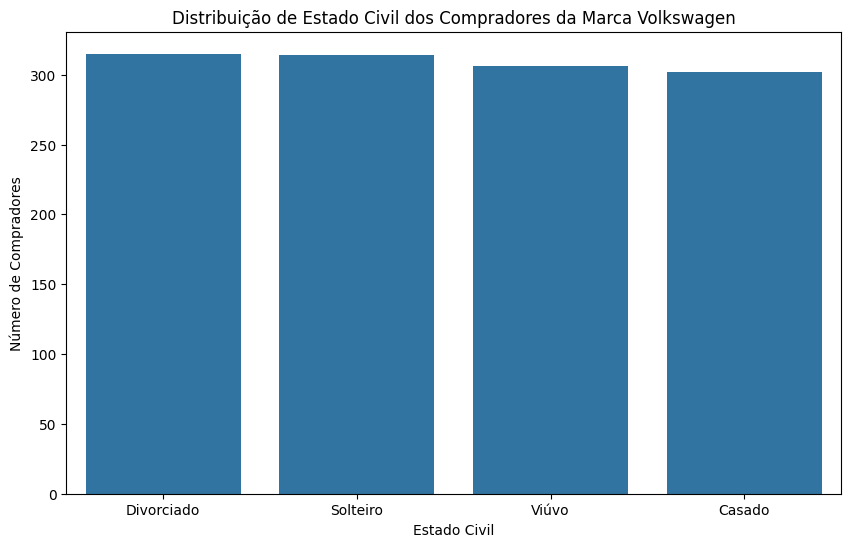

In [ ]:
#verificando distribuição de compradores por estado civil
contagem_estado_civil_volkswagen = analise_volkswagen['Estado Civil'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_volkswagen, x='Estado Civil', order=contagem_estado_civil_volkswagen.index)
plt.title('Distribuição de Estado Civil dos Compradores da Marca Volkswagen')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compradores')
plt.show()

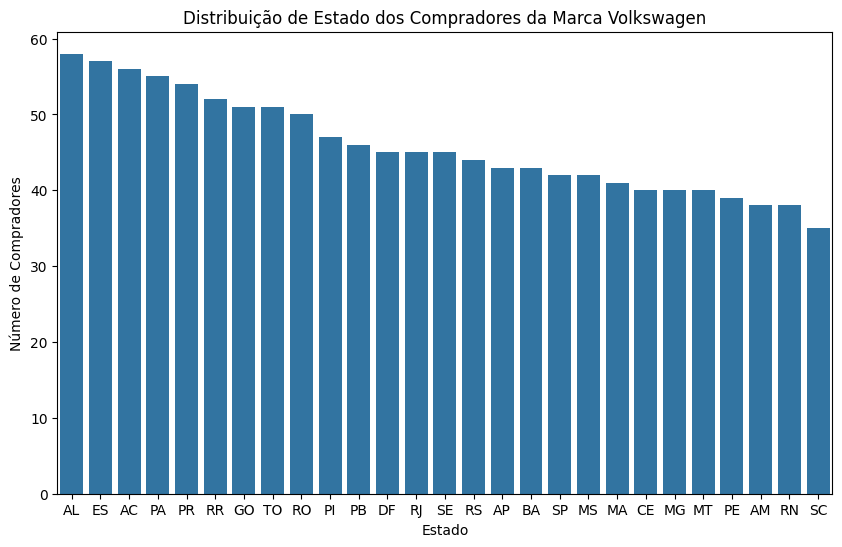

In [ ]:
#verificando distribuição de compradores por estado
contagem_estado_volkswagen = analise_volkswagen['Estado'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_volkswagen, x='Estado', order=contagem_estado_volkswagen.index)
plt.title('Distribuição de Estado dos Compradores da Marca Volkswagen')
plt.xlabel('Estado')
plt.ylabel('Número de Compradores')
plt.show()

**ANÁLISE VOLKSWAGEN:**

As idades estão bem dividas entre os intervalos, e não tem outliers, nesse caso vou utilizar a média de idade como o perfil de idade dos compradores. A distruibuição por Estado Civil está bem dividida, então já podemos utilizar o Estado civil que mais comprou o carro. A distribuição por Estado já possui uma diferença maior, mas não há estados que sejam casos isolados, com poucas vendas. Também será utilizado o Estado com Maior Venda.

**PERFIL DO COMPRADOR DE VOLKSWAGEN:**

IDADE MÉDIA: 44 ANOS

ESTADO CIVIL MAIS COMUM: DIVORCIADO

ESTADO MAIS COMUM: ALAGOAS (AL)

####Análise de perfil para marca Chevrolet

In [ ]:
analise_chevrolet = df[df['Marca'] == 'Chevrolet'].copy()

idade_min_chevrolet = analise_chevrolet['Idade'].min()
idade_max_chevrolet =analise_chevrolet['Idade'].max()

print(f'A menor idade de comprador Chevrolet é {idade_min_chevrolet}')
print(f'A maior idade de comprador Chevrolet é {idade_max_toyota}')

A menor idade de comprador Chevrolet é 18
A maior idade de comprador Chevrolet é 70


In [ ]:
#DIVIDINDO AS IDADES EM INTERVALOS PARA VER COMO ESTÁ A DISTRIBUIÇÃO NESSES INTERVALOS

faixa_chevrolet = ['[18-31[', '[31-44[', '[44-57[', '[57-70]']
# Bins determina o intervalo da categoria
analise_chevrolet['faixa_etaria'] = pd.cut(analise_chevrolet['Idade'], bins=[18,31,44,57,70], labels=faixa)

contagem_faixa_etaria_chevrolet = analise_chevrolet['faixa_etaria'].value_counts()
porcentagem_faixa_etaria_chevrolet = (contagem_faixa_etaria_chevrolet / len(analise_chevrolet['faixa_etaria'])) * 100

print(porcentagem_faixa_etaria_chevrolet)

faixa_etaria
[44-57[   26.69
[18-31[   26.05
[57-70]   23.47
[31-44[   22.51
Name: count, dtype: float64


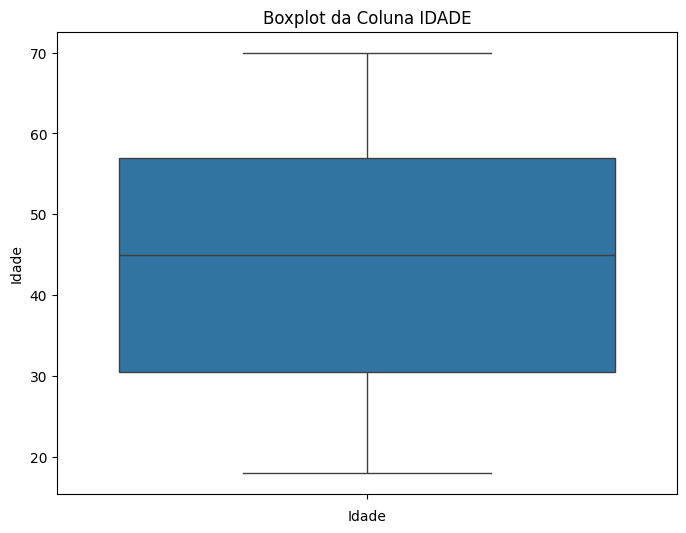

In [ ]:
#BOXPLOT PARA VERIFICAR SE HÁ OUTLIERS
plt.figure(figsize=(8, 6))
sns.boxplot(y=analise_chevrolet['Idade'])
plt.title('Boxplot da Coluna IDADE')
plt.xlabel('Idade')
plt.show()

In [ ]:
# VERIFICANDO MEDIDAS ESTATISTICAS DAS IDADES.
medidas_estatisticas_idade_chevrolet = analise_chevrolet['Idade'].describe()
print(medidas_estatisticas_idade_chevrolet)

count   311.00
mean     43.74
std      15.21
min      18.00
25%      30.50
50%      45.00
75%      57.00
max      70.00
Name: Idade, dtype: float64


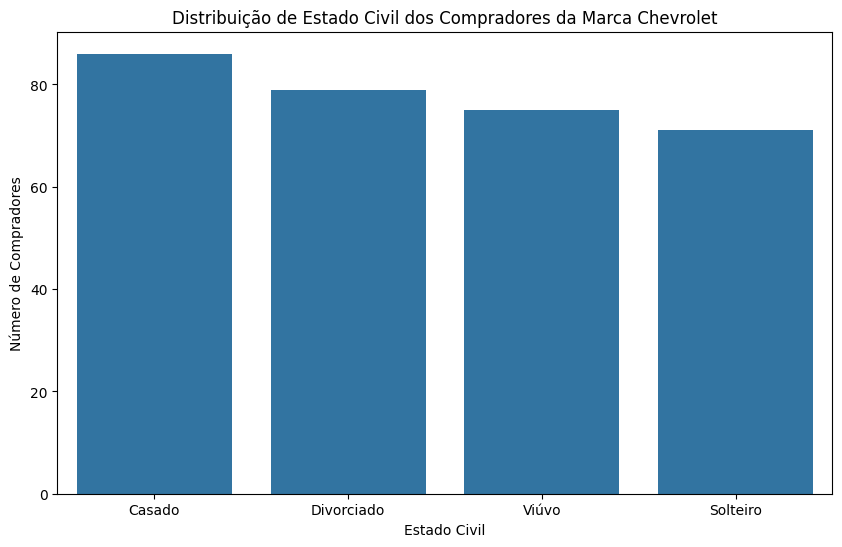

In [ ]:
#verificando distribuição de compradores por estado civil
contagem_estado_civil_chevrolet = analise_chevrolet['Estado Civil'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_chevrolet, x='Estado Civil', order=contagem_estado_civil_chevrolet.index)
plt.title('Distribuição de Estado Civil dos Compradores da Marca Chevrolet')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compradores')
plt.show()

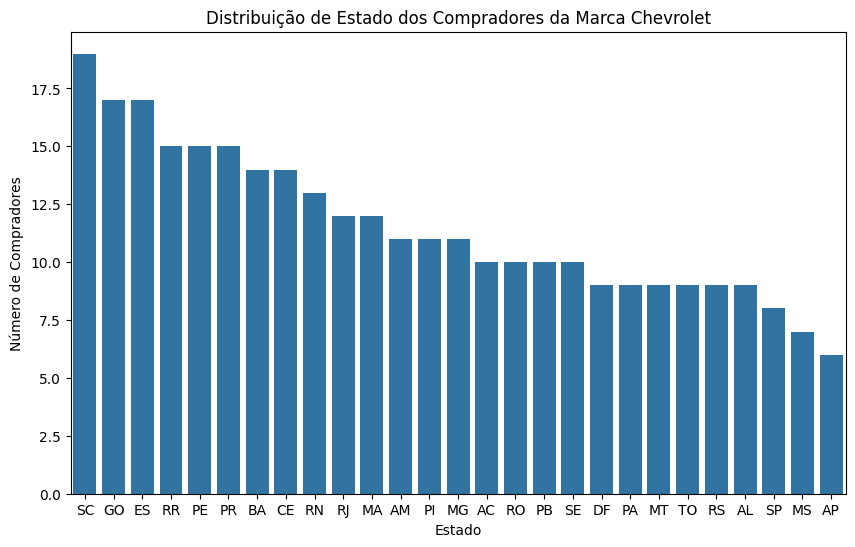

In [ ]:
#verificando distribuição de compradores por estado
contagem_estado_chevrolet = analise_chevrolet['Estado'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_chevrolet, x='Estado', order=contagem_estado_chevrolet.index)
plt.title('Distribuição de Estado dos Compradores da Marca Chevrolet')
plt.xlabel('Estado')
plt.ylabel('Número de Compradores')
plt.show()

**ANÁLISE CHEVROLET:**

As idades estão bem dividas entre os intervalos, e não tem outliers, nesse caso vou utilizar a média de idade como o perfil de idade dos compradores. A distruibuição por Estado Civil está bem dividida, então já podemos utilizar o Estado civil que mais comprou o carro. A distribuição por Estado já possui uma diferença maior, mas não há estados que sejam casos isolados, com poucas vendas. Também será utilizado o Estado com Maior Venda.

**PERFIL DO COMPRADOR DE CHEVROLET:**

IDADE MÉDIA: 43 ANOS

ESTADO CIVIL MAIS COMUM: CASADO

ESTADO MAIS COMUM: SANTA CATARINA (SC)

####Análise de perfil para marca Jeep

In [ ]:
analise_jeep = df[df['Marca'] == 'Jeep'].copy()

idade_min_jeep = analise_jeep['Idade'].min()
idade_max_jeep =analise_jeep['Idade'].max()

print(f'A menor idade de comprador Jeep é {idade_min_jeep}')
print(f'A maior idade de comprador Jeep é {idade_max_jeep}')

'''OBS: essa foi o único modelo que a menor idade mudou de 18 para 19, a unica forma de dividir igualmente é por 3,
mas acho que fica uma faixa pequena, então irei manter a divisão de faixa etária da mesma forma.
'''

A menor idade de comprador Jeep é 19
A maior idade de comprador Jeep é 70


In [ ]:
#DIVIDINDO AS IDADES EM INTERVALOS PARA VER COMO ESTÁ A DISTRIBUIÇÃO NESSES INTERVALOS

faixa_jeep = ['[18-31[', '[31-44[', '[44-57[', '[57-70]']
# Bins determina o intervalo da categoria
analise_jeep['faixa_etaria'] = pd.cut(analise_jeep['Idade'], bins=[18,31,44,57,70], labels=faixa)

contagem_faixa_etaria_jeep = analise_jeep['faixa_etaria'].value_counts()
porcentagem_faixa_etaria_jeep = (contagem_faixa_etaria_jeep / len(analise_jeep['faixa_etaria'])) * 100

print(porcentagem_faixa_etaria_jeep)

faixa_etaria
[57-70]   29.49
[44-57[   28.21
[18-31[   23.08
[31-44[   19.23
Name: count, dtype: float64


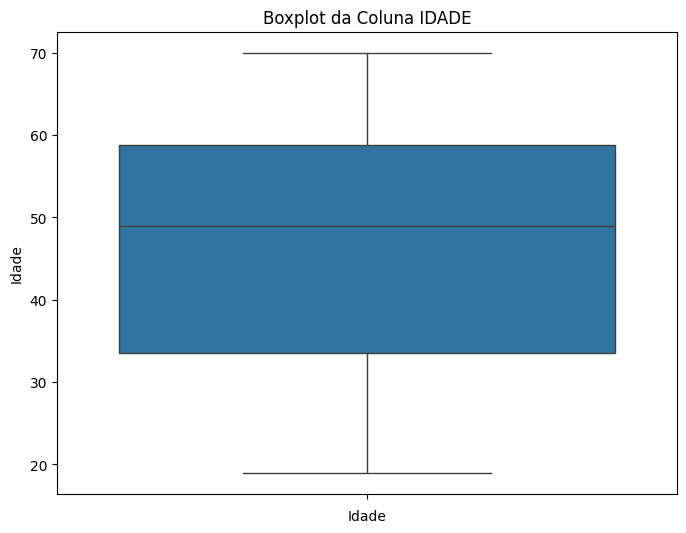

In [ ]:
#BOXPLOT PARA VERIFICAR SE HÁ OUTLIERS
plt.figure(figsize=(8, 6))
sns.boxplot(y=analise_jeep['Idade'])
plt.title('Boxplot da Coluna IDADE')
plt.xlabel('Idade')
plt.show()

In [ ]:
# VERIFICANDO MEDIDAS ESTATISTICAS DAS IDADES.
medidas_estatisticas_idade_jeep = analise_jeep['Idade'].describe()
print(medidas_estatisticas_idade_jeep)

count   78.00
mean    46.50
std     15.53
min     19.00
25%     33.50
50%     49.00
75%     58.75
max     70.00
Name: Idade, dtype: float64


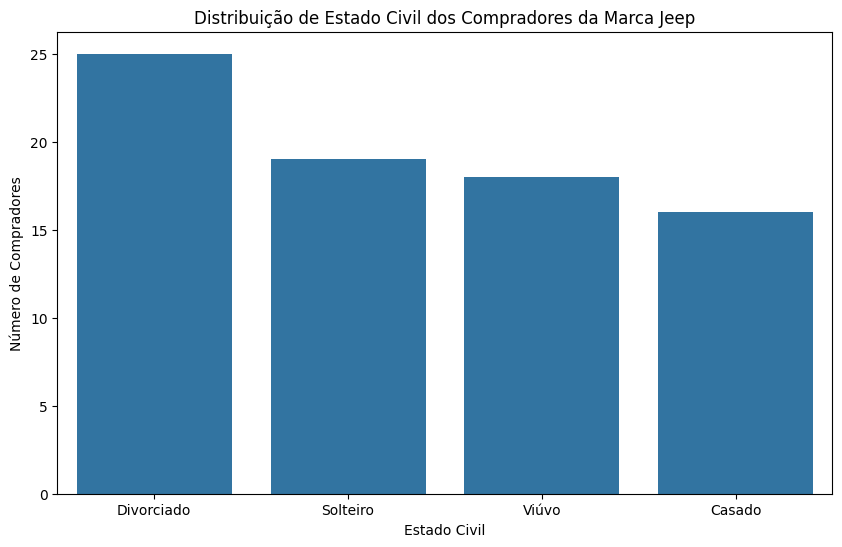

In [ ]:
#verificando distribuição de compradores por estado civil
contagem_estado_civil_jeep = analise_jeep['Estado Civil'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_jeep, x='Estado Civil', order=contagem_estado_civil_jeep.index)
plt.title('Distribuição de Estado Civil dos Compradores da Marca Jeep')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Compradores')
plt.show()

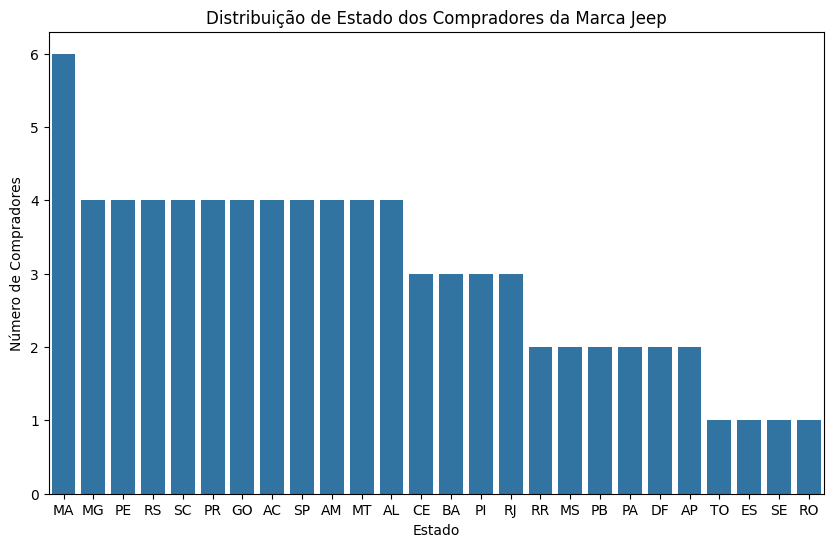

In [ ]:
#verificando distribuição de compradores por estado
contagem_estado_jeep = analise_jeep['Estado'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=analise_jeep, x='Estado', order=contagem_estado_jeep.index)
plt.title('Distribuição de Estado dos Compradores da Marca Jeep')
plt.xlabel('Estado')
plt.ylabel('Número de Compradores')
plt.show()

**ANÁLISE JEEP:**

As idades estão bem dividas entre os intervalos, e não tem outliers, nesse caso vou utilizar a média de idade como o perfil de idade dos compradores. A marce jeep é a menos vendida, então a distrubuição por Estado Civil parece estar mais dividida, mas a quantidade é pequena então essa diferença parece maior visualmente. Vou utilizar o Estado civil que mais comprou o carro. A distribuição por Estado mostra alguns estados com a venda de apenas 1 veículo, se houvessem mais vendas nos estados mais vendidos, poderiamos agrupar esses estamos com poucas vendas para "Outros", de qualquer forma também será utilizado o Estado com Maior Venda.

**PERFIL DO COMPRADOR DE JEEP:**

IDADE MÉDIA: 46 ANOS

ESTADO CIVIL MAIS COMUM: DIVORCIADO

ESTADO MAIS COMUM: MARANHÃO (MA)

##3.2 - Visualização de Dados

* Crie gráficos que mostrem a distribuição de vendas por: Marca

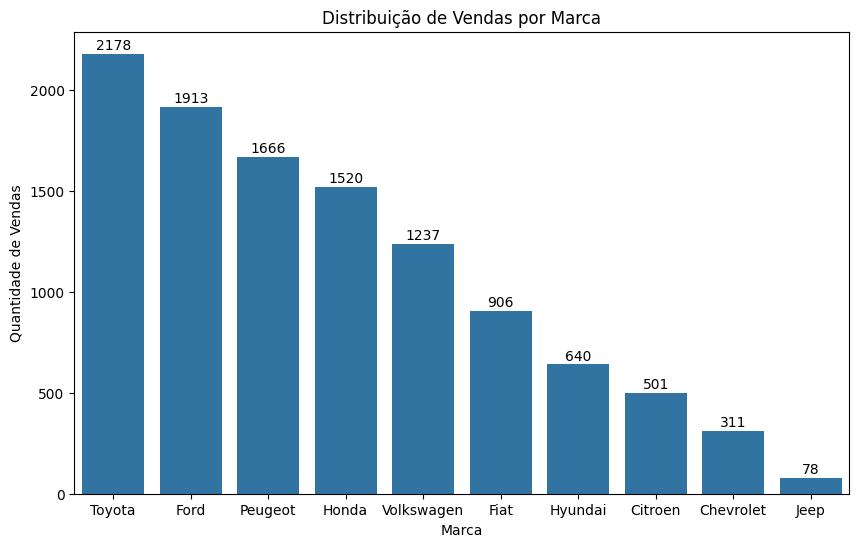

In [ ]:
venda_marca = df['Marca'].value_counts().reset_index()

plt.figure(figsize=(10, 6))
barras_venda_marca=sns.barplot( data=venda_marca,x='Marca', y='count')
plt.title('Distribuição de Vendas por Marca')
plt.xlabel('Marca')
plt.ylabel('Quantidade de Vendas')

#comando para exibir os labels nas barras do gráfico
for container in barras_venda_marca.containers:
  barras_venda_marca.bar_label(container, padding=1)

plt.show()



* Crie gráficos que mostrem a distribuição de vendas por: Estado

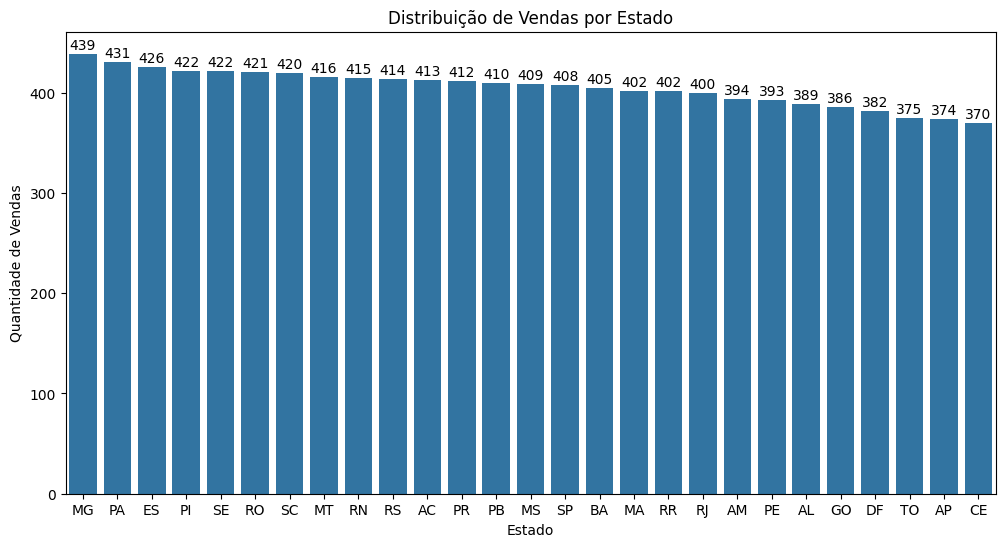

In [ ]:
venda_estado = df['Estado'].value_counts().reset_index()

plt.figure(figsize=(12, 6))
barras_venda_estado=sns.barplot( data=venda_estado,x='Estado', y='count')
plt.title('Distribuição de Vendas por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Vendas')

#comando para exibir os labels nas barras do gráfico
for container in barras_venda_estado.containers:
  barras_venda_estado.bar_label(container, padding=1)

plt.show()

* Crie gráficos que mostrem a distribuição de vendas por: Faixa etária

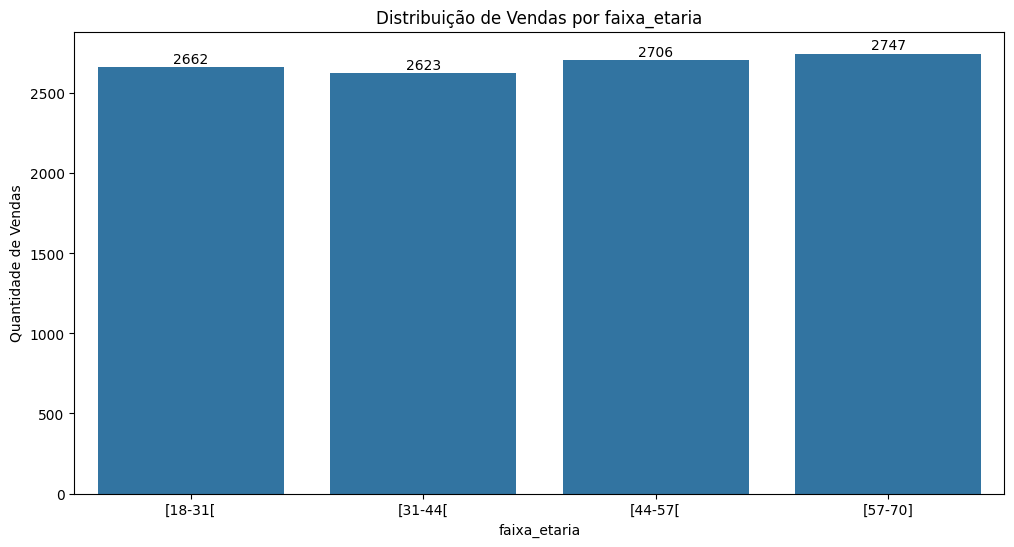

In [ ]:
venda_faixa_etaria = df['faixa_etaria'].value_counts().reset_index()

plt.figure(figsize=(12, 6))
barras_venda_faixa_etaria=sns.barplot( data=venda_faixa_etaria,x='faixa_etaria', y='count')
plt.title('Distribuição de Vendas por faixa_etaria')
plt.xlabel('faixa_etaria')
plt.ylabel('Quantidade de Vendas')

#comando para exibir os labels nas barras do gráfico
for container in barras_venda_faixa_etaria.containers:
  barras_venda_faixa_etaria.bar_label(container, padding=1)

plt.show()

* Crie gráficos que mostrem a distribuição de vendas por: Forma de pagamento

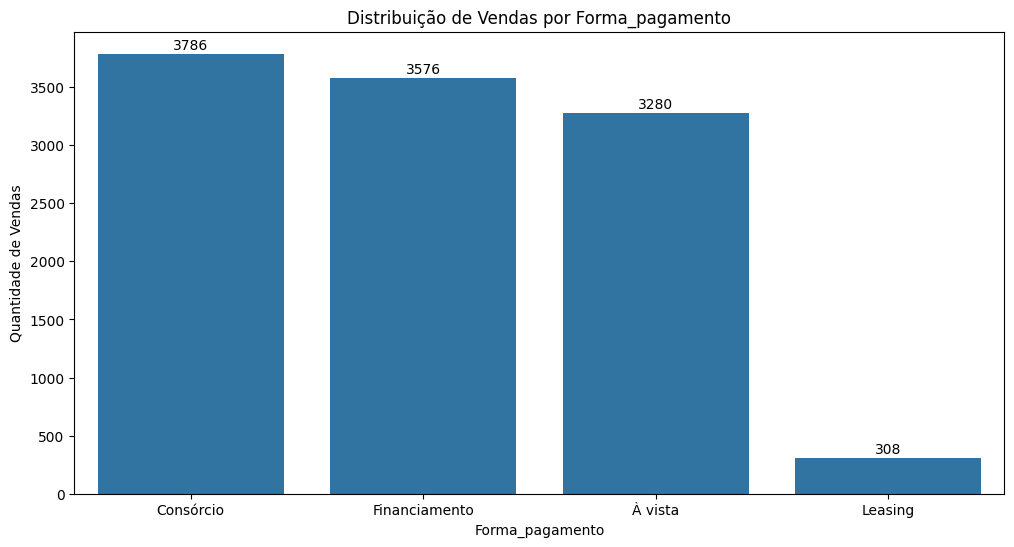

In [ ]:
venda_forma_pagamento = df['Forma_pagamento'].value_counts().reset_index()

plt.figure(figsize=(12, 6))
barras_venda_estado=sns.barplot( data=venda_forma_pagamento,x='Forma_pagamento', y='count')
plt.title('Distribuição de Vendas por Forma_pagamento')
plt.xlabel('Forma_pagamento')
plt.ylabel('Quantidade de Vendas')

#comando para exibir os labels nas barras do gráfico
for container in barras_venda_estado.containers:
  barras_venda_estado.bar_label(container, padding=1)

plt.show()

##3.3 - Análise de Valor

* Quais são os 5 veículos mais caros vendidos?

In [ ]:
veiculos_mais_caros = df.sort_values(by='Valor_venda', ascending=False).head(5)
veiculos_mais_caros

,ID,Nome Completo,Idade,CPF,Sexo,Estado Civil,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento,AnoMes,Ano_venda,faixa_etaria
8625,8626,Francisco Mendonça,63,571.620.894-02,Masculino,Solteiro,mviana@example.com,0300 055 7350,Lopes,DF,Volkswagen,Virtus,2015,Branco,249936.92,2022-09-11,Financiamento,2022-09,2022,[57-70]
4683,4684,Ana Vitória Duarte,24,435.982.076-38,Feminino,Casado,jcarvalho@example.net,+55 (031) 2274-0768,Rodrigues de Costa,PE,Toyota,Camry,2019,Vermelho,249933.36,2021-01-04,Consórcio,2021-01,2021,[18-31[
2074,2075,Rafael Sampaio,20,429.503.681-15,Masculino,Solteiro,ianaragao@example.net,+55 (061) 1983-7326,Fernandes da Praia,AP,Ford,Focus,2018,Preto,249911.06,2019-10-20,Consórcio,2019-10,2019,[18-31[
668,669,Josué Pires,27,861.472.950-20,Masculino,Casado,gaelmoreira@example.org,(084) 9872 3369,Rodrigues,RR,Toyota,Camry,2016,Preto,249881.88,2024-01-01,Consórcio,2024-01,2024,[18-31[
781,782,Théo Cassiano,32,758.934.601-20,Masculino,Divorciado,nina39@example.net,31 1241 1995,Nogueira de Minas,RJ,Peugeot,Partner,2022,Preto,249852.67,2019-01-08,Financiamento,2019-01,2019,[31-44[
